# Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.nn import Linear, Sequential, Dropout, ReLU
from torch import load, inference_mode, round, sigmoid
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report
from torchvision.models.regnet import regnet_y_3_2gf, RegNet_Y_3_2GF_Weights
from torchvision.models.swin_transformer import swin_v2_t, Swin_V2_T_Weights
from torchvision.models.efficientnet import efficientnet_v2_s, EfficientNet_V2_S_Weights

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../")
from utils import CustomDataset, RegNet_transform, EfficientNet_transform, SwinV2_transform

# Preparing Test Data

In [4]:
test_data_regnet = CustomDataset("../Data/Processed/test_set.csv", "../Data/images", "filename", ['Aspergillosis', 'Aspiration', 'Bacterial', 'COVID-19', 'Chlamydophila', 'E.Coli', 'Fungal', 'H1N1', 'Herpes ', 'Influenza', 'Klebsiella', 'Legionella', 'Lipoid', 'MERS-CoV', 'MRSA', 'Mycoplasma', 'No Finding', 'Nocardia', 'Pneumocystis', 'Pneumonia', 'SARS', 'Staphylococcus', 'Streptococcus', 'Tuberculosis', 'Unknown', 'Varicella', 'Viral', 'todo'], transform=RegNet_transform)
test_data_efficientnet = CustomDataset("../Data/Processed/test_set.csv", "../Data/images", "filename", ['Aspergillosis', 'Aspiration', 'Bacterial', 'COVID-19', 'Chlamydophila', 'E.Coli', 'Fungal', 'H1N1', 'Herpes ', 'Influenza', 'Klebsiella', 'Legionella', 'Lipoid', 'MERS-CoV', 'MRSA', 'Mycoplasma', 'No Finding', 'Nocardia', 'Pneumocystis', 'Pneumonia', 'SARS', 'Staphylococcus', 'Streptococcus', 'Tuberculosis', 'Unknown', 'Varicella', 'Viral', 'todo'], transform=EfficientNet_transform)
test_data_swinv2 = CustomDataset("../Data/Processed/test_set.csv", "../Data/images", "filename", ['Aspergillosis', 'Aspiration', 'Bacterial', 'COVID-19', 'Chlamydophila', 'E.Coli', 'Fungal', 'H1N1', 'Herpes ', 'Influenza', 'Klebsiella', 'Legionella', 'Lipoid', 'MERS-CoV', 'MRSA', 'Mycoplasma', 'No Finding', 'Nocardia', 'Pneumocystis', 'Pneumonia', 'SARS', 'Staphylococcus', 'Streptococcus', 'Tuberculosis', 'Unknown', 'Varicella', 'Viral', 'todo'], transform=SwinV2_transform)

In [5]:
test_dataloader_regnet = DataLoader(test_data_regnet, 16, True)
test_dataloader_efficientnet = DataLoader(test_data_efficientnet, 16, True)
test_dataloader_swinv2 = DataLoader(test_data_swinv2, 16, True)

# Preparing Models

## RegNet

In [6]:
regnet_model = regnet_y_3_2gf()
regnet_model.fc = Linear(1512, 28)
regnet_model.load_state_dict(load("../Models/FinetunedRegNet.pth"))

<All keys matched successfully>

In [8]:
total_params = sum(p.numel() for p in regnet_model.parameters())
print(f"Total Parameters: {total_params}")

Total Parameters: 17965702


## EfficientNet

In [10]:
efficientnet_model = efficientnet_v2_s()
efficientnet_model.classifier = Sequential(
    Dropout(p=0.2),
    ReLU(),
    Linear(in_features=1280, out_features=28)
)
efficientnet_model.load_state_dict(load("../Models/FinetunedEfficientNet.pth"))

<All keys matched successfully>

In [11]:
total_params = sum(p.numel() for p in efficientnet_model.parameters())
print(f"Total Parameters: {total_params}")

Total Parameters: 20213356


## SwinV2

In [12]:
swinv2_model = swin_v2_t()
swinv2_model.head = Linear(768, 28)
swinv2_model.load_state_dict(load("../Models/FinetunedSwinV2.pth"))

<All keys matched successfully>

In [13]:
total_params = sum(p.numel() for p in swinv2_model.parameters())
print(f"Total Parameters: {total_params}")

Total Parameters: 27604102


# Testing Performance

## Accuracy

### RegNet

In [19]:
regnet_true_labels = []
regnet_pred_labels = []
regnet_model.eval()
with inference_mode():
    for batch, labels in test_dataloader_regnet:
        outputs = regnet_model(batch)
        preds = round(sigmoid(outputs))
        regnet_true_labels.extend(labels.cpu().numpy())
        regnet_pred_labels.extend(preds.cpu().numpy())

regnet_true_labels = np.array(regnet_true_labels)
regnet_pred_labels = np.array(regnet_pred_labels)

regnet_accuracy = accuracy_score(regnet_true_labels, regnet_pred_labels)

print(f'Accuracy: {regnet_accuracy * 100:.2f}%')

Accuracy: 51.08%


### EfficientNet

In [21]:
efficientnet_true_labels = []
efficientnet_pred_labels = []
efficientnet_model.eval()
with inference_mode():
    for batch, labels in test_dataloader_efficientnet:
        outputs = efficientnet_model(batch)
        preds = round(sigmoid(outputs))
        efficientnet_true_labels.extend(labels.cpu().numpy())
        efficientnet_pred_labels.extend(preds.cpu().numpy())

efficientnet_true_labels = np.array(efficientnet_true_labels)
efficientnet_pred_labels = np.array(efficientnet_pred_labels)

efficientnet_accuracy = accuracy_score(efficientnet_true_labels, efficientnet_pred_labels)

print(f'Accuracy: {efficientnet_accuracy * 100:.2f}%')

Accuracy: 45.70%


### Swinv2

In [22]:
swinv2_true_labels = []
swinv2_pred_labels = []
swinv2_model.eval()
with inference_mode():
    for batch, labels in test_dataloader_swinv2:
        outputs = swinv2_model(batch)
        preds = round(sigmoid(outputs))
        swinv2_true_labels.extend(labels.cpu().numpy())
        swinv2_pred_labels.extend(preds.cpu().numpy())

swinv2_true_labels = np.array(swinv2_true_labels)
swinv2_pred_labels = np.array(swinv2_pred_labels)

swinv2_accuracy = accuracy_score(swinv2_true_labels, swinv2_pred_labels)

print(f'Accuracy: {swinv2_accuracy * 100:.2f}%')

Accuracy: 52.69%


## Confusion Matrix

### RegNet

In [28]:
regnet_cf = multilabel_confusion_matrix(regnet_true_labels, regnet_pred_labels)
print(classification_report(regnet_true_labels, regnet_pred_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.75      0.21      0.33        14
           3       0.69      0.73      0.71        98
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       1.00      0.25      0.40         4
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.33    

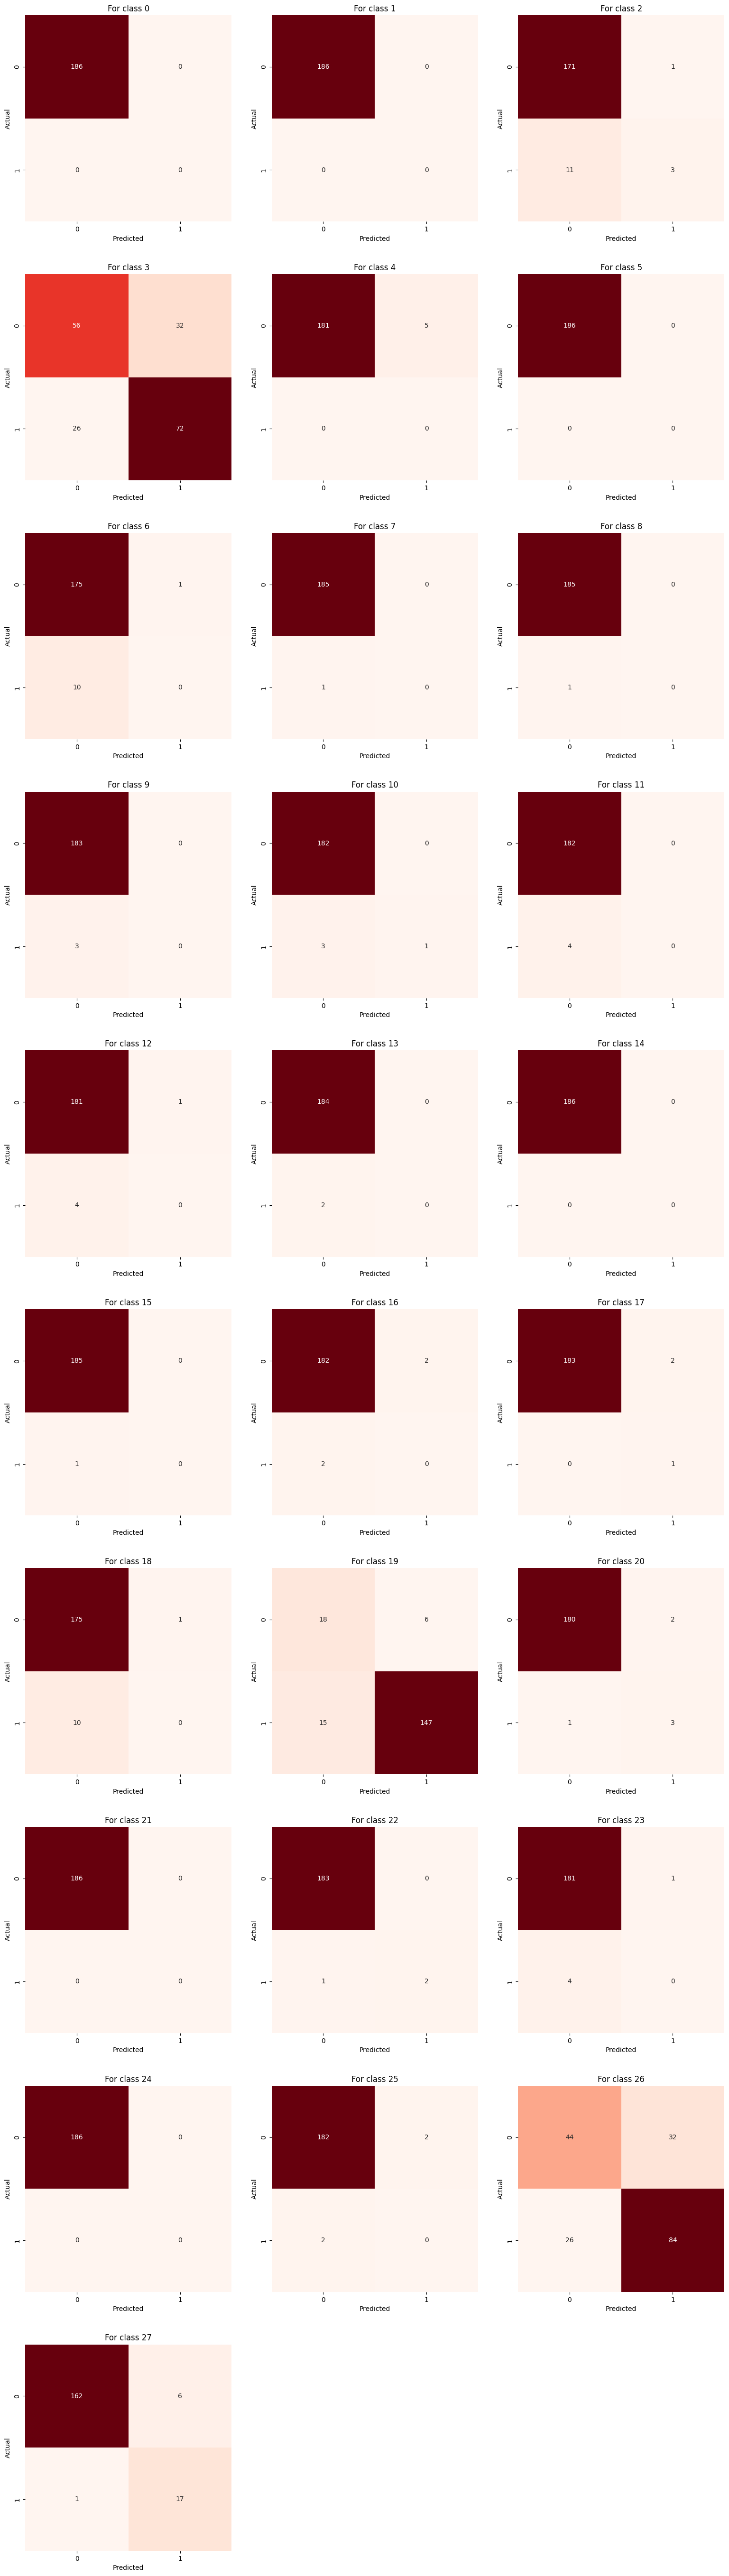

In [35]:
num_plots = len(regnet_cf)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows*5.5))
fig.tight_layout(pad=3)

for i, ax in enumerate(axes.flat):
    if i < num_plots:
        sns.heatmap(regnet_cf[i], cmap="Reds", annot=True, cbar=False, square=True, fmt='d', ax=ax)
        ax.set_title("For class {}".format(i))
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
    else:
        fig.delaxes(ax)

plt.show()